## Small Image Classification Using Convolutional Neural Network (CNN)

#### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="images/small_images.jpg" style="width:850px;height:600px;">

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

##### Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:50]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

##### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

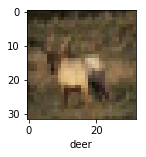

In [ ]:
plot_sample(X_train, y_train, 3)

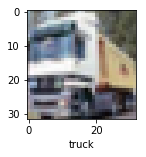

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### Normalizing the training data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
50000/50000 [==============================] - 118s 2ms/sample - loss: 14.4447 - acc: 0.0995
Epoch 2/5
50000/50000 [==============================] - 111s 2ms/sample - loss: 14.5063 - acc: 0.1000
Epoch 3/5
50000/50000 [==============================] - 120s 2ms/sample - loss: 14.5063 - acc: 0.1000
Epoch 4/5
50000/50000 [==============================] - 122s 2ms/sample - loss: 14.5063 - acc: 0.1000
Epoch 5/5
50000/50000 [==============================] - 124s 2ms/sample - loss: 14.5063 - acc: 0.1000


### You can see that at the end of 5 epochs, accuracy is at around 48.48%

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.48      0.54      1000
           1       0.65      0.47      0.55      1000
           2       0.29      0.51      0.37      1000
           3       0.33      0.39      0.36      1000
           4       0.53      0.18      0.27      1000
           5       0.43      0.35      0.38      1000
           6       0.49      0.57      0.53      1000
           7       0.78      0.29      0.42      1000
           8       0.62      0.62      0.62      1000
           9       0.41      0.75      0.53      1000

   micro avg       0.46      0.46      0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



### Now let us build a convolutional neural network to train our images

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 390s 8ms/sample - loss: 1.4755 - acc: 0.4717
Epoch 2/10
50000/50000 [==============================] - 49s 979us/sample - loss: 1.1335 - acc: 0.6046
Epoch 3/10
50000/50000 [==============================] - 40s 798us/sample - loss: 1.0038 - acc: 0.6499
Epoch 4/10
50000/50000 [==============================] - 38s 766us/sample - loss: 0.9169 - acc: 0.6837
Epoch 5/10
50000/50000 [==============================] - 41s 827us/sample - loss: 0.8560 - acc: 0.7019
Epoch 6/10
50000/50000 [==============================] - 40s 800us/sample - loss: 0.8022 - acc: 0.7238
Epoch 7/10
50000/50000 [==============================] - 38s 769us/sample - loss: 0.7583 - acc: 0.7361
Epoch 8/10
50000/50000 [==============================] - 39s 782us/sample - loss: 0.7183 - acc: 0.7524
Epoch 9/10
50000/50000 [==============================] - 38s 765us/sample - loss: 0.6838 - acc: 0.7626
Epoch 10/10
50000/50000 [==============================] - 38s 77

### With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 77s 8ms/sample - loss: 0.9098 - acc: 0.7080


[0.9097772479057312, 0.708]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.0434032e-03, 4.4233220e-05, 1.8602049e-02, 7.8327805e-01,
        5.3409211e-05, 7.9009980e-02, 2.6042411e-02, 1.9270490e-05,
        8.9600846e-02, 3.0630006e-04],
       [1.3454035e-02, 3.4986632e-03, 3.3792531e-07, 2.9303120e-09,
        2.0733665e-08, 4.1919476e-10, 9.0019824e-08, 6.7794143e-12,
        9.8298246e-01, 6.4430336e-05],
       [1.4404580e-01, 4.8980635e-01, 1.0621994e-03, 1.0393569e-03,
        2.0688858e-03, 1.9061839e-04, 7.7135279e-05, 7.3260767e-04,
        3.4211707e-01, 1.8859936e-02],
       [3.8572037e-01, 3.4309280e-01, 1.6177333e-03, 3.1819046e-04,
        1.6308100e-04, 2.2536577e-05, 2.7912273e-04, 6.7523833e-06,
        2.6811618e-01, 6.6318957e-04],
       [3.1540710e-06, 1.4008451e-05, 9.7282268e-03, 4.5891227e-03,
        6.5725744e-01, 2.2051749e-03, 3.2617784e-01, 1.0082598e-05,
        1.4661702e-05, 3.1767010e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6])

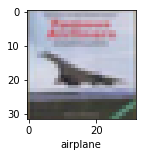

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

# CNN MODEL

<img src="images/CNN.jpg" style="width:1200px;height:300px;">

### The formula for calculating a dimension of the output of conv layer is
## ((n+2p-f)/s)+1